In [344]:
#array to use to map plaintext to ciphertext 
array = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
array2 = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

pair_array = []
diagram = []

#method to process the plaintext and encrypt it 
def playfair_cipher(plaintext, key):
    processed_text = playfair_text_processing(plaintext)
    pairer(processed_text)
    diagramMaker(processed_text, key)
    return playfair_cipher_encrypt(processed_text)

def playfair_text_processing(plaintext):
    processed_string = ''
    for letter in plaintext:
        if letter.isalpha():
            if letter.upper()=='J':
                processed_string+='I'
            else:
                processed_string+=letter.upper()
    return processed_string

def pairer(string):
    i=0
    while i < (len(string)):
        if i ==len(string)-1:
                pair_array.append(string[i]+'X')
                break

        if string[i]==string[i+1]:
            pair_array.append(string[i]+'X')
            i+=1
        else:
            pair_array.append(string[i]+string[i+1])
            i=i+2

def diagramMaker(processed_string, key):
    remaining = len(key)
    scanner = 0
    count=0
    dic={}
    for i in range(5):
        column = []
        for j in range(5):
            if remaining>0:
                column.append(key[len(key)-remaining])
                dic[key[len(key)-remaining]]=0
                remaining-=1
            else:
                while array[scanner] in dic:
                    scanner+=1
                column.append(array[scanner])
                dic[array[scanner]]=0
                scanner+=1
        diagram.append(column)

def xyfinder(letter):
    for row in range(5):
        for column in range(5):
            if diagram[row][column] == letter:
                return row, column

In [345]:
def playfair_cipher_encrypt(processed_text):
    ciphertext=''
    for pair in pair_array: 
        x1, y1 = xyfinder(pair[0])
        x2,y2 = xyfinder(pair[1])
        
        if x1==x2:
            newC1 = (y1+1)%5
            newC2 = (y2+1)%5
            ciphertext+=diagram[x1][newC1]+diagram[x2][newC2]
        elif y1==y2:
            newR1 = (x1+1)%5
            newR2 = (x2+1)%5
            ciphertext+=diagram[newR1][y1]+diagram[newR2][y2]
        else:
            ciphertext+=diagram[x1][y2]+diagram[x2][y1]
    return ciphertext
                              


In [346]:
def playfair_cipher_decrypter(ciphertext):
    pairer(ciphertext)
    plaintext=''
    for pair in pair_array:
        x1, y1 = xyfinder(pair[0])
        x2,y2 = xyfinder(pair[1])
        
        if x1==x2:
            newC1 = (y1-1)%5
            newC2 = (y2-1)%5
            plaintext+=diagram[x1][newC1]+diagram[x2][newC2]
        elif y1==y2:
            newR1 = (x1-1)%5
            newR2 = (x2-1)%5
            plaintext+=diagram[newR1][y1]+diagram[newR2][y2]
        else:
            plaintext+=diagram[x1][y2]+diagram[x2][y1]
    return plaintext              

                              


In [347]:
#Vigenere
#Vigenere
#Vigenere
#Vigenere
#Vigenere
#Vigenere


In [348]:
        
def vigenere_cipher(plaintext, key):
        return vigenere_cipher_encrypter(text_processing(plaintext), key)

def text_processing(plaintext):
    processed_string = ''
    for letter in plaintext:
        if letter.isalpha():
            processed_string+=letter.upper()
    return processed_string

def vigenere_cipher_encrypter(processed_string, key):
    ciphertext=''
    # print(processed_string)
    keylen = len(key)
    stringlen = len(processed_string)
    
    if keylen < stringlen:
        mult = int((stringlen / keylen)+1)
        key = key*int(mult)
        key = key[:stringlen]
        
    for i in range(stringlen):
        P = array2.index(processed_string[i])
        C = ((P + array2.index(key[i])) %26)
        ciphertext+=array2[C]
    return ciphertext

def vigenere_cipher_decrypter(processed_string, key):
    plaintext=''
    keylen = len(key)
    stringlen = len(processed_string)
    if keylen < stringlen:
        mult = (stringlen / keylen)+1
        key = key*int(mult)
        key = key[:stringlen]
        
    for i in range(stringlen):
        P = array2.index(processed_string[i])
        C = ((P - array2.index(key[i])) %26)
        plaintext+=array2[C]
    return plaintext


In [349]:
numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

#Letter Frequency
import matplotlib.pyplot as plt

def letter_frequency(text):
    processed_string = text_processing(text)
    dictionary = {}
    for letter in processed_string:
        if letter in dictionary:
            dictionary[letter]+=1
        else:
            dictionary[letter]=1
    length = len(text)
    scaled_values =[]
    for value in dictionary.values():
        scaled_values.append((value/length)*100)
    plt.bar(dictionary.keys(),scaled_values)
    plt.show()
    
def relative_letter_frequency(plaintext, playfair_ciphertext, vigenere_ciphertext):
    plaintext_dic = {}
    playfair_dic = {}
    vigenere_dic = {}
  
    for letter in plaintext:
        if letter in plaintext_dic:
            plaintext_dic[letter]+=1
        else:
            plaintext_dic[letter]=1
            
    for letter in array2:
        if letter not in plaintext_dic:
            plaintext_dic[letter]=0
        

    plaintext_length = len(plaintext)
    plaintext_scaled_values =[]
    
    for value in plaintext_dic.values():
        scaled_value = (value/plaintext_length)*100
        plaintext_scaled_values.append(scaled_value)
    
    numbermax = max(plaintext_scaled_values)
    numbermin = min(plaintext_scaled_values)
    
    # print('initial min and max', numbermax, numbermin)

        
    # for i in range(len(plaintext_scaled_values)):
    # plaintext_scaled_values[i] = plaintext_scaled_values[i] / plaintext_max
    
    sorted_plaintext_scaled_values = sorted(plaintext_scaled_values, reverse=True)

    
    for letter in playfair_ciphertext:
        if letter in playfair_dic:
            playfair_dic[letter]+=1
        else:
            playfair_dic[letter]=1
            
    for letter in array2:
        if letter not in playfair_dic:
            playfair_dic[letter]=0
    
   
        
    playfair_length = len(playfair_ciphertext)
    playfair_scaled_values =[]
    for value in playfair_dic.values():
        playfair_scaled_values.append((value/playfair_length)*100)
    
    playfair_max = max(playfair_scaled_values)
    playfair_min = min(playfair_scaled_values)
    
    if numbermax < playfair_max:
        numbermax = playfair_max
    if numbermin > playfair_min:
        numbermin = playfair_min
        
    # print('after playfair', numbermax, numbermin)

        
#     for i in range(len(playfair_scaled_values)):
#         playfair_scaled_values[i] = playfair_scaled_values[i] / playfair_max
    
    sorted_playfair_scaled_values = sorted(playfair_scaled_values, reverse=True)
    
    # plt.plot(playfair_dic.keys(),playfair_scaled_values)
    
    for letter in vigenere_ciphertext:
        if letter in vigenere_dic:
            vigenere_dic[letter]+=1
        else:
            vigenere_dic[letter]=1
        
    for letter in array2:
        if letter not in vigenere_dic:
            vigenere_dic[letter]=0
    
   
    vigenere_length = len(vigenere_ciphertext)
    vigenere_scaled_values =[]
    
    for value in vigenere_dic.values():
        vigenere_scaled_values.append((value/vigenere_length)*100)
    
    vigenere_max = max(vigenere_scaled_values)
    vigenere_min = min(vigenere_scaled_values)
    
    if numbermax < vigenere_max:
        numbermax = vigenere_max
    if numbermin > vigenere_min:
        numbermin = vigenere_min
        
    # print('after vigenere', numbermax, numbermin)


        
    sorted_vigenere_scaled_values = sorted(vigenere_scaled_values, reverse=True)

    for i in range(len(vigenere_scaled_values)):
        sorted_plaintext_scaled_values[i] = (sorted_plaintext_scaled_values[i] - numbermin) / (numbermax - numbermin)
        sorted_playfair_scaled_values[i] = (sorted_playfair_scaled_values[i] - numbermin) / (numbermax - numbermin)
        sorted_vigenere_scaled_values[i] = (sorted_vigenere_scaled_values[i] - numbermin) / (numbermax - numbermin)
        

            
    
    #blue
    plt.plot(numbers,sorted_plaintext_scaled_values)
    
    #orange
    plt.plot(numbers,sorted_playfair_scaled_values)
    
    #green
    plt.plot(numbers,sorted_vigenere_scaled_values)

    plt.show()
    
        # return dictionary
#At this point, processed_string should have the original string with only the characters and all capitalized

In [350]:
plaintext = 'c.	Section 1: A text processing procedure'
word_document = """CIIC5018 / ICOM5018
Network Security and Cryptography

Project 2: Playfair Cipher and Vigenere Cipher

Overview 

In this exercise, you will need to design and implement Playfair cipher and Vigenere cipher, and then compare the relative frequency of letters in the plaintext and cyphertext. The programming language is Python.

Document requirements

To work on the exercise, you will need to prepare three documents following the guidelines below. 

1.	A design document
a.	Cover page
i.	It shall include the title of the document, your name, student ID, department and university information, etc.
b.	Table of content
c.	Section 1: The Playfair cipher (encryption and decryption)
i.	The input of encryption is a plaintext and a key
1.	The plaintext must be the output of the procedure described in section 1 of Project 1
ii.	The return of encryption is a ciphertext
iii.	The input of decryption is a cyphertext and a key
iv.	The return of decryption is a plaintext
v.	Explain your design to deal with the situation that two input letters are the same
vi.	Explain your design to deal with the situation that the last plaintext is a single letter
d.	Section 2: The Vigenere cipher (encryption and decryption)
i.	The input of encryption is a plaintext and a key
1.	The plaintext must be the output of the procedure described in section 1 of Project 1
ii.	The return of encryption is a ciphertext
iii.	The input of decryption is a cyphertext and a key
iv.	The return of decryption is a plaintext
e.	Section 3: The relative frequencies of letters in a string
i.	The input is a string that contains only capitalized English letters
ii.	The output is a sorted (decreasing order) array of relative frequencies of letters
f.	References
i.	Cite at least 5 references
ii.	The link to your YouTube video must be included here
2.	A Python program saved in a Jupyter notebook
a.	The following functions shall be implemented based on the pseudo codes in the design document:
i.	The Playfair encryption function.
ii.	The Playfair decryption function.
iii.	The Vigenere encryption function.
iv.	The Vigenere decryption function.
v.	The relative frequency function.
vi.	Some test functions.
b.	To verify your encryption and decryption functions, you must show that the plaintext can be accurately recovered after you used the same key to encrypt and decrypt
c.	To test the Playfair cipher, you shall use key “MAXFRESH”.
d.	To test the Vigenere cipher, you shall use repeated key “MAXFRESH”.
e.	To show the result of the relative frequency function. You must 
i.	use all the text in this Word document as the input of the text processing procedure and generate the plaintext, then 
ii.	encrypt the plaintext using the Playfair cipher to generate ciphertext 1, then
iii.	encrypt the plaintext using the Vigenere cipher to generate ciphertext 2, then
iv.	generate the relative frequencies for plaintext, ciphertext 1 and ciphertext 2, and finally
v.	plot a figure to compare relative frequencies (similar to Figure 2.6 in the textbook).
3.	A YouTube video to walk through your code
a.	In the video, you shall go through Step 2.c to verify your encryption and decryption functions of the Playfair cipher.
b.	In the video, you shall go through Step 2.d to verify your encryption and decryption functions of the Vigenere cipher.
c.	In the video, you shall go through Step 2.e and show the figure of relative frequencies. 
d.	Upload the video to YouTube, set the video as private, then share it to me (Kejie.lu@upr.edu)


Submission

Submit a single zip file that includes:
1.	the design document 
2.	the Jupyter notebook

Evaluation

1.	Rubrics are used in the evaluation.
2.	You must carefully review all rubrics before preparing for the documents.

"""


In [351]:
# processed_string = text_processing(word_document)
# print(processed_string)
playfair_text= playfair_cipher(word_document,'MAXFRESH')
pair_array = []
print(playfair_cipher_decrypter(playfair_text))
# print('\n')

vigenere_text = vigenere_cipher(word_document,'MAXFRESH')
print(vigenere_cipher_decrypter(vigenere_text,'MAXFRESH'))



CIICICOMNETWORKSECURITYANDCRYPTOGRAPHYPROIECTPLAYFAIRCIPHERANDVIGENERECIPHEROVERVIEWINTHISEXERCISEYOUWILLNEXEDTODESIGNANDIMPLEMENTPLAYFAIRCIPHERANDVIGENERECIPHERANDTHENCOMPARETHERELATIVEFREQUENCYOFLETTERSINTHEPLAINTEXTANDCYPHERTEXTXTHEPROGRAMMINGLANGUAGEISPYTHONDOCUMENTREQUIREMENTSTOWORKONTHEXEXERCISEYOUWILLNEXEDTOPREPARETHREXEDOCUMENTSFOLXLOWINGTHEGUIDELINESBELOWADESIGNDOCUMENTACOVERPAGEIITSHALLINCLUDETHETITLEOFTHEDOCUMENTYOURNAMESTUDENTIDDEPARTMENTANDUNIVERSITYINFORMATIONETCBTABLEOFCONTENTCSECTIONTHEPLAYFAIRCIPHERENCRYPTIONANDDECRYPTIONITHEINPUTOFENCRYPTIONISAPLAINTEXTANDAKEYTHEPLAINTEXTMUSTBETHEOUTPUTOFTHEPROCEDUREDESCRIBEDINSECTIONOFPROIECTIXITHERETURNOFENCRYPTIONISACIPHERTEXTIIXITHEINPUTOFDECRYPTIONISACYPHERTEXTANDAKEYIVTHERETURNOFDECRYPTIONISAPLAINTEXTVEXPLAINYOURDESIGNTODEALWITHTHESITUATIONTHATTWOINPUTLETXTERSARETHESAMEVIEXPLAINYOURDESIGNTODEALWITHTHESITUATIONTHATXTHELASTPLAINTEXTISASINGLELETTERDSECTIONTHEVIGENERECIPHERENCRYPTIONANDXDECRYPTIONITHEINPUTOFENCRYPTIONISAPLAINTEXTAND

processed_string


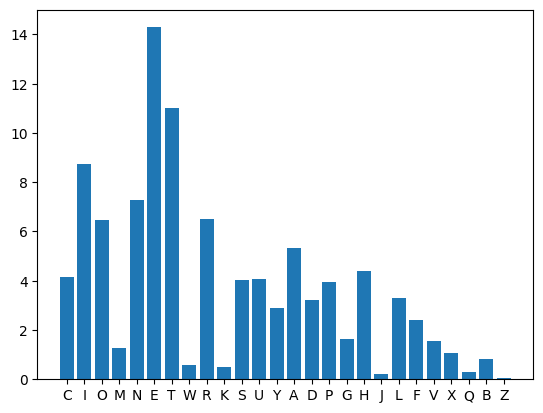

playfair_text


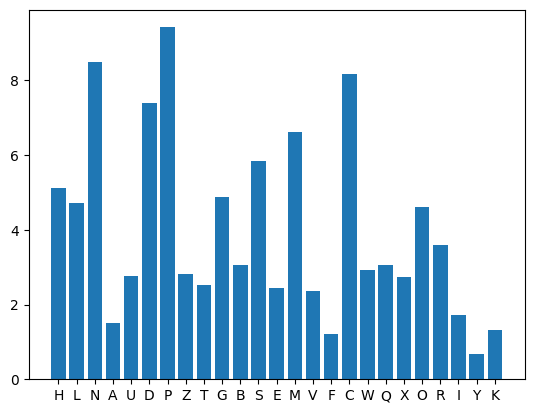

vigenere_text


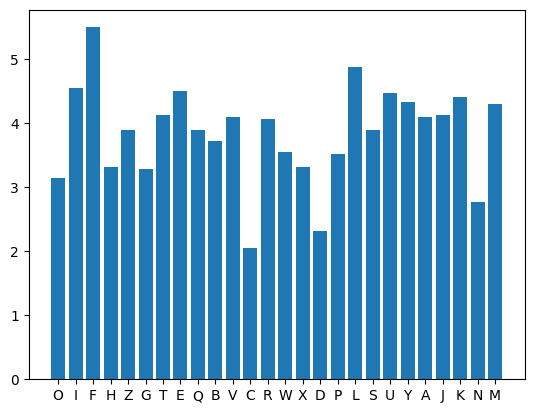

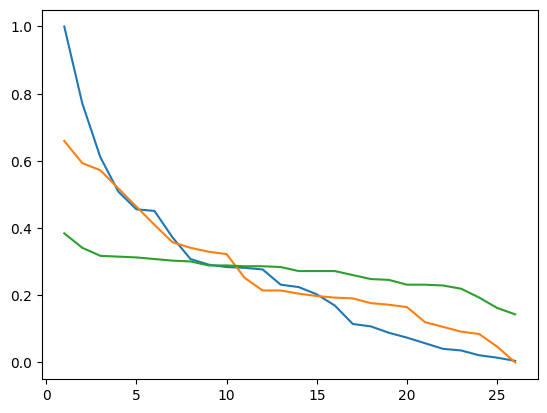

In [352]:
print('processed_string')
letter_frequency(processed_string)
print('playfair_text')
letter_frequency(playfair_text)
print('vigenere_text')
letter_frequency(vigenere_text)

relative_letter_frequency(processed_string, playfair_text, vigenere_text)

In [343]:
#blue is plaintext
#orange is playfair
#green is vigenere